Michelle Campoli (mec2308)\
Homework 2 \
Problem 2 & 3

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # unzip files: homework2 and homework1 data
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/hw2-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2')

with zipfile.ZipFile('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/hw1-data-1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2')

Problem 2



In [ ]:
# Baye's Classifier data
# unzipped files: y.csv X.csv README
import pandas as pd
from sklearn.model_selection import KFold

X = pd.read_csv("/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Bayes_classifier/X.csv", header= None).values
y = pd.read_csv("/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Bayes_classifier/y.csv", header= None).values
kf = KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
# each row is an email. each column is a word/symbol acting as its own dimension of x. 
# The number of times each word/symbol appears is recorded per row.
X[:5]

array([[ 0,  6,  6,  0,  3,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  3,
         0, 13, 19,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  8,  0,  0],
       [ 2,  3,  5,  0,  1,  3,  2,  1,  0,  9,  2,  8,  7,  2,  1,  1,
         1,  3, 35,  0, 16,  0,  4,  4,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  4,  2,  0],
       [ 1,  0,  7,  0, 12,  2,  2,  1,  6,  3,  4,  5,  1,  0, 18,  1,
         1, 10, 14,  3,  5,  0, 12,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0,
         0,  1,  0,  3,  2,  0],
       [ 0,  0,  0,  0,  6,  0,  3,  6,  3,  6,  3,  3,  3,  0,  0,  3,
         0,  0, 32,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  0,  0],
    

In [ ]:
# 0 = spam, 1 = not spam
y[:5,:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# function for confusion matrix
def compute_confusion_matrix(y_test,y_prediction):
    TP = 0
    FP = 0
    TN = 0
    FN = 0    
    for i in range(len(y_test)):
        if(y_prediction[i] == y_test[i]):
            if(y_prediction[i] == 0):
                TN+=1
            else:
                TP+=1
        else:
            if(y_prediction[i] == 0):
                FN+=1
            else:
                FP+=1
    return [TP,FP,FN,TN]

In [ ]:
# Naive Bayes function
import numpy as np
import math
from scipy.stats import poisson
from sklearn.metrics import pairwise_distances

TP = []
FP = []
TN = []
FN = []

lambda0=[]
lambda1=[]


for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
    py0 = len(np.where(y_train == 0)[0])/len(X_train)
    py1 = len(np.where(y_train == 1)[0])/len(X_train)
    
    lambda_0_values = []
    lambda_1_values = []
    
    for j in range(len(X_train[0])):
        lambda0_numerator = 1
        lambda0_denominator = 1
        lambda1_numerator = 1
        lambda1_denominator = 1

        for i in range(len(X_train)):
            lambda1_numerator+=(y_train[i] * X_train[i][j])
            lambda1_denominator+=(y_train[i])
     
            lambda0_numerator+=((1-y_train[i]) * X_train[i][j])
            lambda0_denominator+=(1-y_train[i])
        lambda_0_values.append((lambda0_numerator/lambda0_denominator)[0])
        lambda_1_values.append((lambda1_numerator/lambda1_denominator)[0])
        
    lambda0.append(lambda_0_values)
    lambda1.append(lambda_1_values)
    y_predictions = []
    
    for i in range(len(X_test)):
        
        y_prob = []
        product_0 = 1
        product_1 = 1

        for j in range(len(X_test[0])):
            poisson_prob_0 = poisson.pmf(X_test[i][j],lambda_0_values[j])
            poisson_prob_1 = poisson.pmf(X_test[i][j],lambda_1_values[j])
            
            product_0*=poisson_prob_0
            product_1*=poisson_prob_1
        
        y_prob.append(product_0*py0)
        y_prob.append(product_1*py1)

        y_predictions.append(np.argmax(y_prob))
        
    results = compute_confusion_matrix(y_test,y_predictions)
    
    TP.append(results[0])
    FP.append(results[1])
    FN.append(results[2])
    TN.append(results[3])

In [ ]:
# compute confusion matrix

confusion_matrix = [[sum(TP),sum(FP)],[sum(FN),sum(TN)]]
print("The Confusion Matrix is:")

print(confusion_matrix[0])
print(confusion_matrix[1])

# compute accuracy
print("The Accuracy is:", ((confusion_matrix[0][0] + confusion_matrix[1][1]) / 4600))

The Confusion Matrix is:
[1705, 491]
[108, 2296]
The Accuracy is: 0.8697826086956522


In [ ]:
avg_poisson_parameter_0 = np.mean(lambda0, axis=0)
avg_poisson_parameter_1 = np.mean(lambda1, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


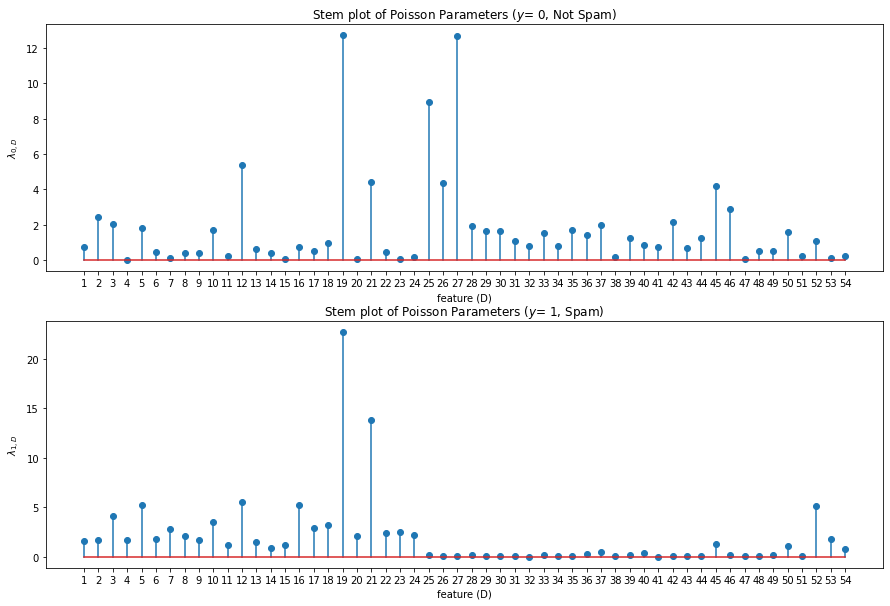

In [ ]:
# stem plot for poisson parameters
import matplotlib.pyplot as plt

fig1, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
ax[0].stem(range(1,55),avg_poisson_parameter_0)
ax[0].set_title("Stem plot of Poisson Parameters ($y$= 0, Not Spam)")
ax[0].set_xlabel("feature (D)")
ax[0].set_ylabel("$\lambda_{0,D}$")
ax[0].set_xticks(np.arange(1,55, step=1))

ax[1].stem(range(1,55),avg_poisson_parameter_1)
ax[1].set_title("Stem plot of Poisson Parameters ($y$= 1, Spam)")
ax[1].set_xlabel("feature (D)")
ax[1].set_ylabel("$\lambda_{1,D}$")
ax[1].set_xticks(np.arange(1,55, step=1))
plt.show()

#save plot
fig1.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/stem_plots.jpeg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


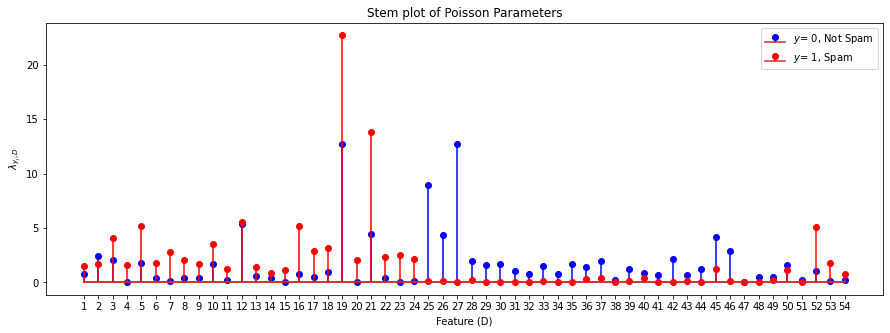

In [ ]:
# overlap stem plots
plt.figure(figsize=(15, 5))
plt.stem(range(1,55), avg_poisson_parameter_0, "blue", markerfmt="bo", label="$y$= 0, Not Spam")
plt.stem(range(1,55), avg_poisson_parameter_1, "red", markerfmt="ro", label="$y$= 1, Spam")
plt.title("Stem plot of Poisson Parameters")
plt.xlabel("Feature (D)")
plt.ylabel("$\lambda_{y_i,D}$")
plt.xticks(np.arange(1,55, step=1))
plt.legend()
fig2 = plt.gcf()
plt.show()

# save figure
fig2.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/stem_plot_overlay.jpeg')
plt.show()

In [ ]:
# KNN classifier
TP = []
FP = []
TN = []
FN = []
all_predictions=[]
all_labels = []
for train_index,test_index in kf.split(X):
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    all_labels.append([i[0] for i in y_test])
    tp = np.zeros(shape = (20))
    fp = np.zeros(shape = (20))
    fn = np.zeros(shape = (20))
    tn = np.zeros(shape = (20))
    mean = np.mean(X_train,axis=0)
    std = np.std(X_train,axis=0)
    X_train = (X_train - mean)/std
    X_test = (X_test - mean)/std
    predictions=[]
    for row in range(len(X_test)):
        distances=[]
        #computing the distance matrix
        for j in X_train:
            distances.append(np.sum(np.abs(X_test[row]-j)))
#       Finding 20 Nearest neighbours of the test sample. 
#       list_neighbours = [i[0] for i in sorted(enumerate(distances), key=lambda x:x[1])][:20]
        list_neighbours = np.argsort(distances)[:20]
        pred = []
        for k in range(1,21):
            count_1 = len(np.where(y_train[list_neighbours[:k]] == 1)[0])
            count_0 = len(np.where(y_train[list_neighbours[:k]] == 0)[0])
            # picking the nearest neighbour's label in the case of tie.
            if(count_1==count_0):
                temp_prediction = y_train[list_neighbours[0]][0]
                pred.append(temp_prediction)
                if(temp_prediction == y_test[row][0]):
                    if(temp_prediction == 1):
                        tp[k-1]+=1
                    else:
                        tn[k-1]+=1
                else:
                    if(temp_prediction == 1):
                        fp[k-1]+=1
                    else:
                        fn[k-1]+=1
            elif(count_1>count_0):
                temp_prediction = 1
                pred.append(temp_prediction)
                if(temp_prediction == y_test[row][0]):
                    tp[k-1]+=1
                else:
                    fp[k-1]+=1
            else:
                temp_prediction = 0
                pred.append(temp_prediction)
                if(temp_prediction == y_test[row][0]):
                    tn[k-1]+=1
                else:
                    fn[k-1]+=1
        predictions.append(pred)
    all_predictions.append(predictions)
    TP.append(list(tp))
    FP.append(list(fp))
    TN.append(list(tn))
    FN.append(list(fn))

In [ ]:
# compute accuracy values based on confusion matrix diagonal/4600
TP_list = (list(np.sum(TP,axis=0)))
FP_list = (list(np.sum(FP,axis=0)))
FN_list = (list(np.sum(FN,axis=0)))
TN_list = (list(np.sum(TN,axis=0)))
prediction_accuracies_cumulative = []
for i in range(20):
    prediction_accuracies_cumulative.append((TP_list[i] + TN_list[i])/
                                            (TP_list[i] + TN_list[i] + FP_list[i] + FN_list[i]))

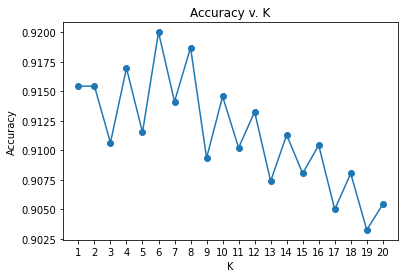

In [ ]:
# plot prediction accuracies as a function of k
plt.plot(range(1,21),prediction_accuracies_cumulative)
plt.scatter(range(1,21),prediction_accuracies_cumulative)
plt.title("Accuracy v. K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21, step=1))
fig3 = plt.gcf()
plt.show()

# save figure
fig3.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/knn_accuracy_plot.jpeg')
plt.show()

Problem 3

In [ ]:
# homework 1 data 
# unzipped files: y_train.csv, y_test.csv, X_train.csv, X_test.csv
# import data

y_train = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Gaussian_process/y_train.csv', header=None).values
y_test = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Gaussian_process/y_test.csv', header=None).values
X_train = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Gaussian_process/X_train.csv', header=None).values
X_test = pd.read_csv(r'/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/Gaussian_process/X_test.csv', header=None).values

In [ ]:
# root mean squared error function (RMSE)

def RMSE(y_predicted,y_test):
    y_predicted = np.array(y_predicted)
    y_test = np.array(y_test)
    return np.sqrt(np.sum((y_predicted - y_test)**2)/len(y_test))

In [ ]:
# Gaussian process function

class Gaussian_process:
    def __init__(self,X_train,y_train, sigma2, b):
        self.sigma2 = sigma2
        self.b = b
        self.X_train = X_train
        self.y_train = y_train
        
    def Kernel(self,xi,xj):
        return math.exp((-1/self.b) * np.sum((xi -xj)**2))
    
    def fit(self):
        K = []
        for i in self.X_train:
            temp = []
            for j in self.X_train:
                temp.append(self.Kernel(i,j))
            K.append(temp)
        self.K = np.asarray(K)
        
    def predict(self,x0):
        temp = []
        for j in self.X_train:
            temp.append(self.Kernel(x0,j))
        KxD = np.asarray(temp)
        sigma2I = self.sigma2 * np.identity(self.K.shape[0])
        mean = (np.matmul(np.matmul(KxD,np.linalg.inv(sigma2I + self.K)), self.y_train))[0] # mean of gaussian process as prediction
        variance = self.sigma2 + self.Kernel(x0,x0) + np.matmul(np.matmul(KxD,np.linalg.inv(sigma2I + self.K)), np.transpose(KxD))
        
        return [mean,variance]

In [ ]:
# set b = {5,7,9,11,13,15} and sigma^2 = {.1,.2,.3,.4,.5,.6,.7,.8,.9,1} 
# (b, sigma^2)
B = [5,7,9,11,13,15]
Sigma2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [ ]:
# calculate RMSE on the 42 test points as in hw 1. use the mean of the gaussian process at the test point as your prediction
RMSES = []
y_test = [i[0] for i in y_test]
for b in B:
    temp = [] 
    for sigma2 in Sigma2:
        y_predicted = []
        process = Gaussian_process(X_train,y_train,sigma2 = sigma2, b = b)
        process.fit()
        for i in X_test:
            y_predicted.append(process.predict(i)[0])
        temp.append(RMSE(y_predicted,y_test))
    RMSES.append(temp)

In [ ]:
# table showing rmse values per pair
rmse_values = pd.DataFrame(RMSES, columns = Sigma2, index = B)
rmse_values

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966277,1.933137,1.923422,1.922199,1.924771,1.929215,1.934636,1.940585,1.946822,1.953215
7,1.920164,1.904878,1.908082,1.915904,1.924806,1.933704,1.942256,1.950382,1.958095,1.965440
9,1.897650,1.902521,1.917650,1.932517,1.945702,1.957237,1.967406,1.976494,1.984743,1.992344
11,1.890509,1.914983,1.938851,1.957939,1.973218,1.985767,1.996378,2.005606,2.013838,2.021347
13,1.895850,1.935588,1.964600,1.985504,2.001317,2.013881,2.024313,2.033309,2.041320,2.048644
15,1.909605,1.959551,1.990806,2.011918,2.027373,2.039467,2.049466,2.058107,2.065847,2.072978


In [ ]:
# best rmse
rmse_values.min()

0.1    1.890509
0.2    1.902521
0.3    1.908082
0.4    1.915904
0.5    1.924771
0.6    1.929215
0.7    1.934636
0.8    1.940585
0.9    1.946822
1.0    1.953215
dtype: float64

In [ ]:
# Re-run algorithm using only 4th dimension of xi(car weight)
X_carweight_train = X_train[:,3] #4th dimension is indexed as 3
X_carweight_test = X_test[:,3]

In [ ]:
# set b = 5, sigma^2 = 2
b2 = 5
sigma22 = 2

In [ ]:
y_predicted_train = []
process = Gaussian_process(X_carweight_train,y_train,sigma2 = sigma22, b = b2)
process.fit()
for i in X_carweight_train:
    y_predicted_train.append(process.predict(i)[0])

In [ ]:
y_train = [i[0] for i in y_train]
X_carweight_train = list(X_carweight_train)
y_preds = [i for i,_ in sorted(zip(y_predicted_train,X_carweight_train), key=lambda pair: pair[1])]

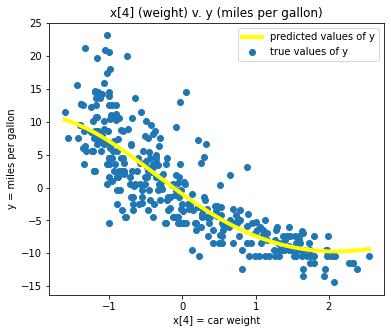

In [ ]:
# scatter plot of data (x[4] vs y for each point)
plt.figure(figsize=(6,5))
plt.scatter(X_carweight_train,y_train, label = "true values of y")
plt.plot(sorted(X_carweight_train),y_preds,color="yellow",linewidth=4.0,label = "predicted values of y")
plt.xlabel("x[4] = car weight")
plt.ylabel("y = miles per gallon")
plt.title("x[4] (weight) v. y (miles per gallon)")
plt.legend()
fig4 = plt.gcf()
plt.show()

# save figure
fig4.savefig('/content/drive/MyDrive/ELENE4720_ML_Signals/Homework_2/gaussian_process_plot.jpeg')
plt.show()